### Popularity Prediction:-


#### Objective: Predict track popularity scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\dataset.csv")
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df=pd.DataFrame(dataset)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
print(df["Unnamed: 0"].nunique())
print(df["track_id"].nunique())
print(df["artists"].nunique())
print(df["album_name"].nunique())
print(df["track_name"].nunique())

113999
89740
31437
46589
73608


In [11]:
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'],axis=1,inplace=True)

In [12]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
mapp={False:0,True:1}
df["explicit"]=df["explicit"].map(mapp)

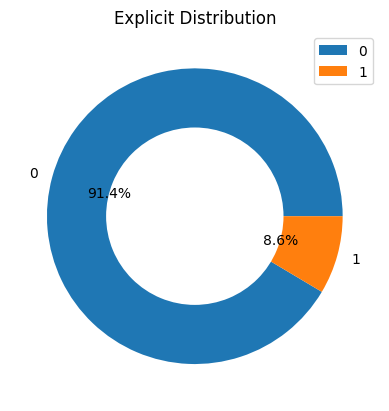

In [14]:
explicit=df["explicit"].value_counts().reset_index()
plt.pie(x=explicit["count"],labels=explicit["explicit"],autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.title("Explicit Distribution")
plt.legend(loc=1)
plt.show()

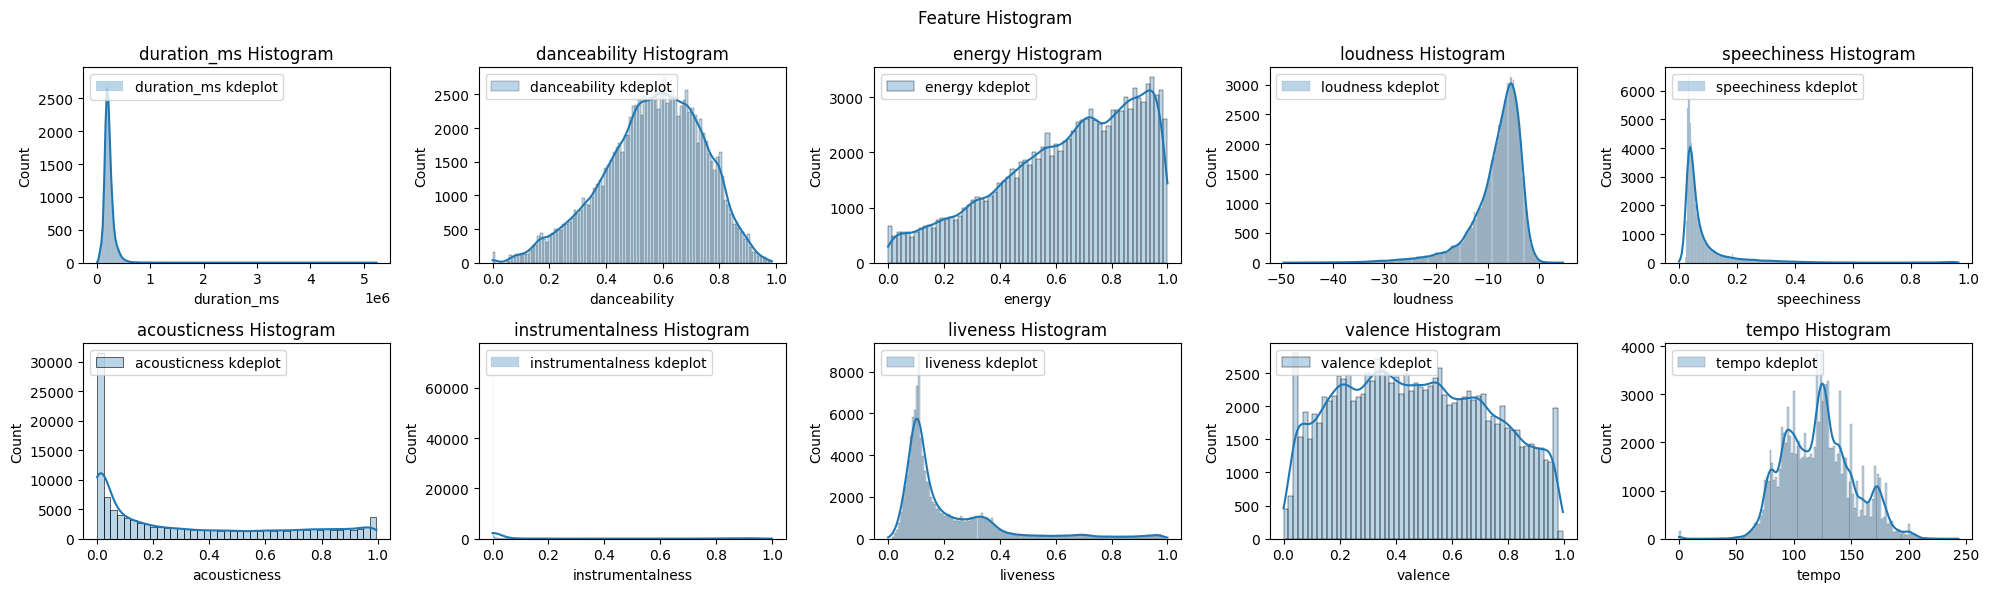

In [15]:
col=['duration_ms','danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,5,figsize=(20,6))
for index,feature in enumerate(col):
       row=index//5
       col=index%5
       sns.histplot(df[feature],ax=ax[row,col],kde=True,alpha=0.3,label="{} kdeplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()


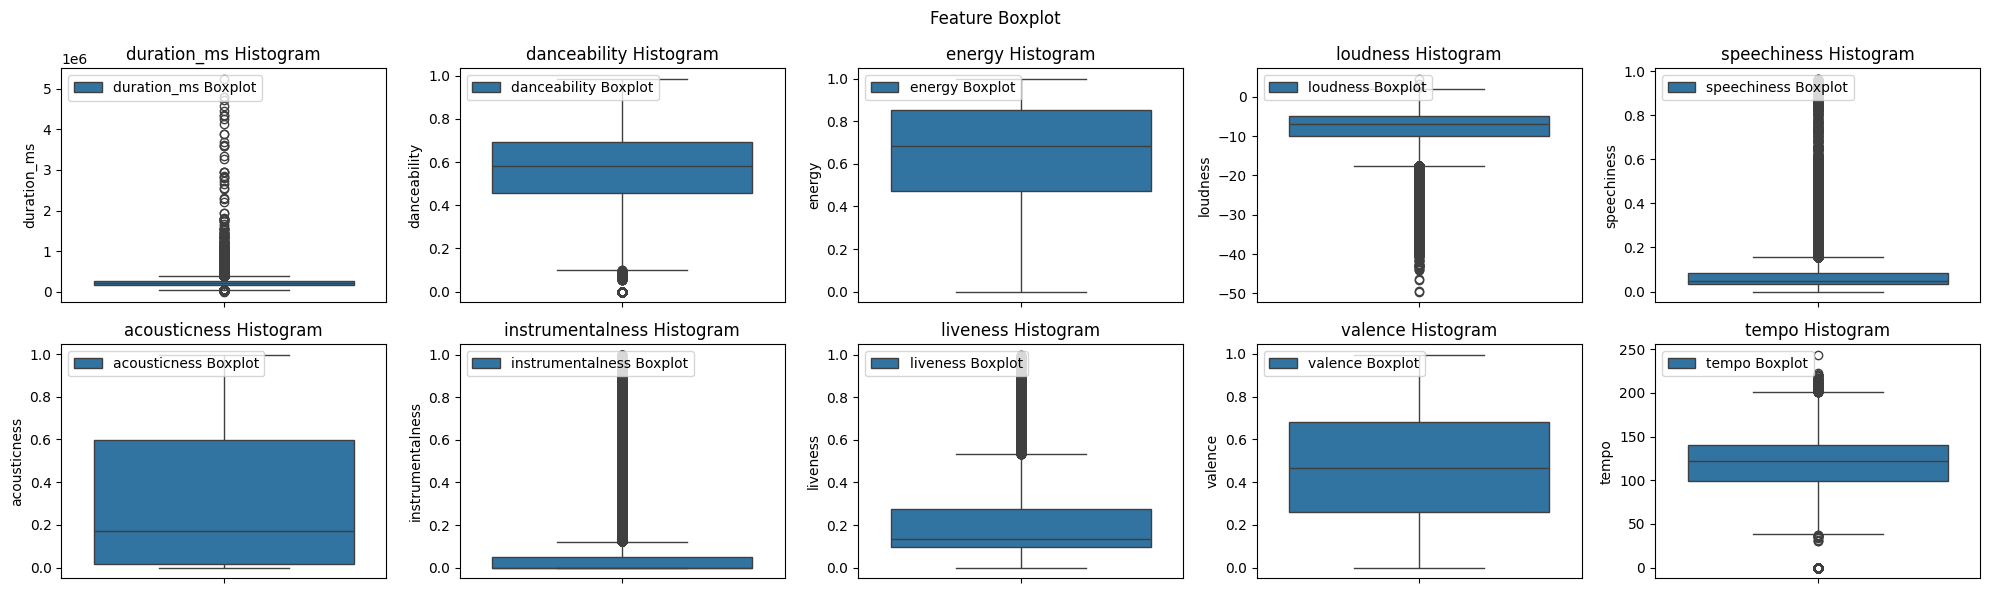

In [16]:
col=['duration_ms','danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,5,figsize=(20,6))
for index,feature in enumerate(col):
       row=index//5
       col=index%5
       sns.boxplot(df[feature],ax=ax[row,col],label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Boxplot")
plt.tight_layout()
plt.show()


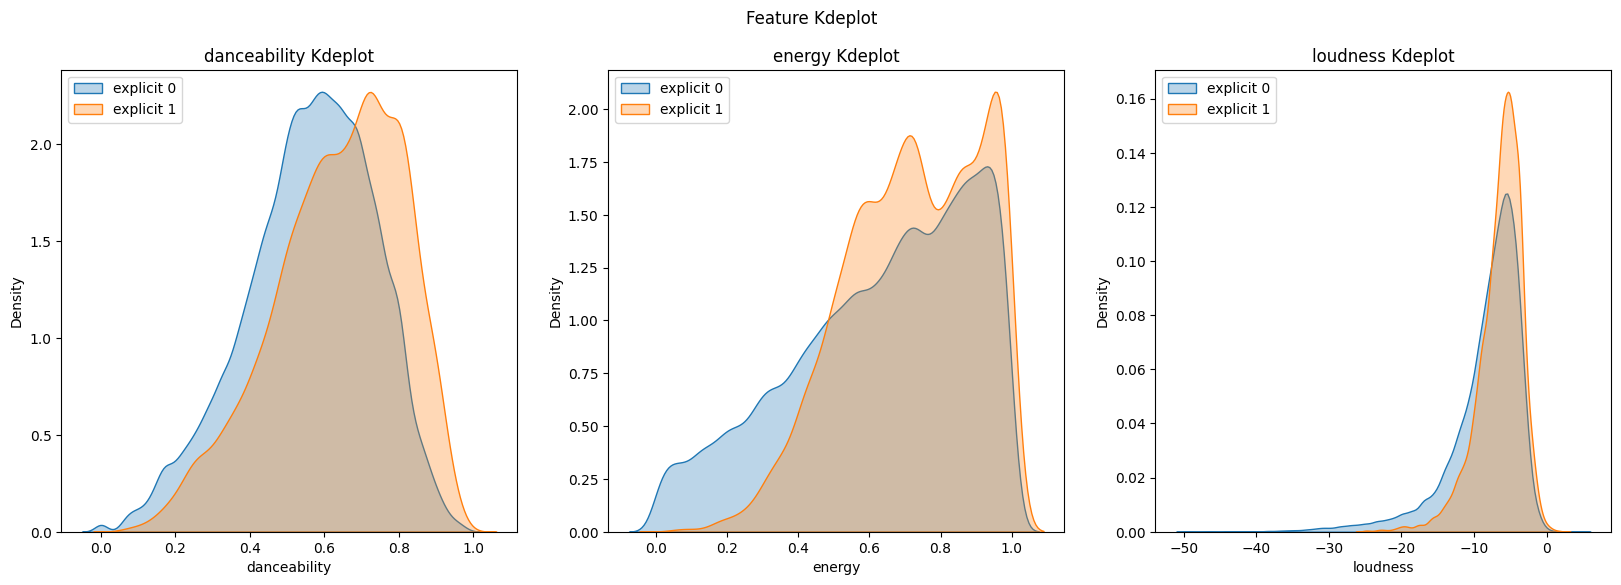

In [17]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
col1=["danceability",	"energy",	"loudness"	]
for index,feature in enumerate(col1):
    col=index%3
    sns.kdeplot(df[df["explicit"]==0][feature],fill=True,alpha=0.3,ax=ax[col],label="explicit 0")
    sns.kdeplot(df[df["explicit"]==1][feature],alpha=0.3,fill=True,ax=ax[col],label="explicit 1")
    ax[col].set_title("{} Kdeplot".format(feature))
    ax[col].legend()
plt.suptitle("Feature Kdeplot")
plt.show()

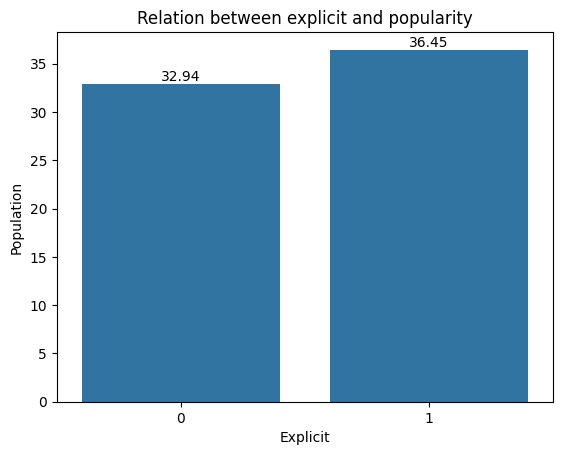

In [18]:
popularity=df.groupby("explicit")["popularity"].mean().reset_index()
bar=sns.barplot(x="explicit",y="popularity",data=popularity)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("Explicit")
plt.ylabel("Population")
plt.title("Relation between explicit and popularity")
plt.show()

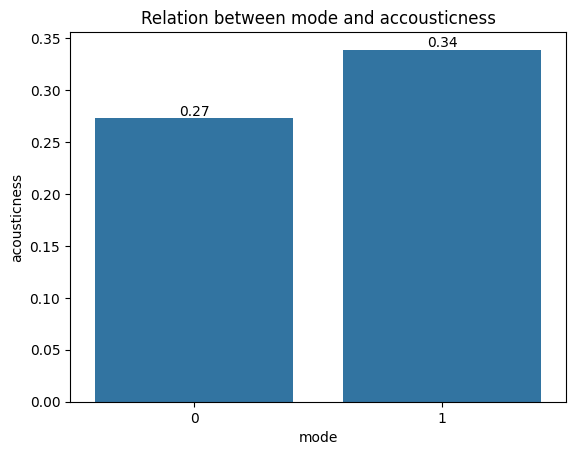

In [19]:
mode=df.groupby("mode")["acousticness"].mean().reset_index()
bar=sns.barplot(x="mode",y="acousticness",data=mode)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("mode")
plt.ylabel("acousticness")
plt.title("Relation between mode and accousticness")
plt.show()

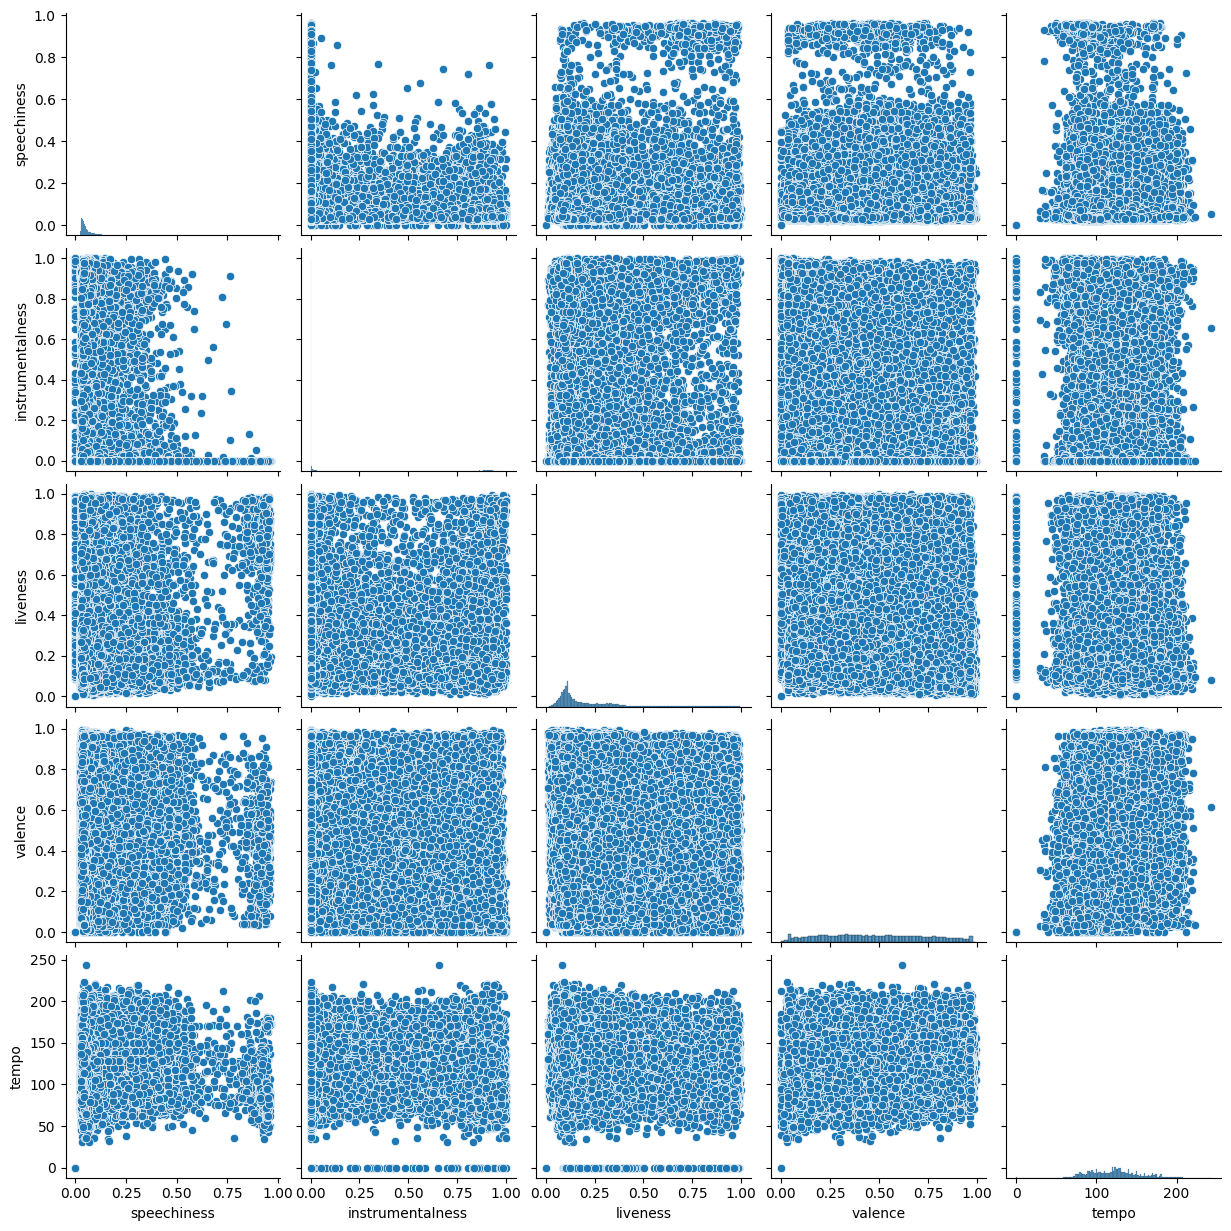

In [20]:
sns.pairplot(data=df,vars=["speechiness","instrumentalness","liveness","valence","tempo"],kind="scatter")
plt.show()

In [21]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [22]:
col=['duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
dff=df[col]
dff

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [23]:
dff.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

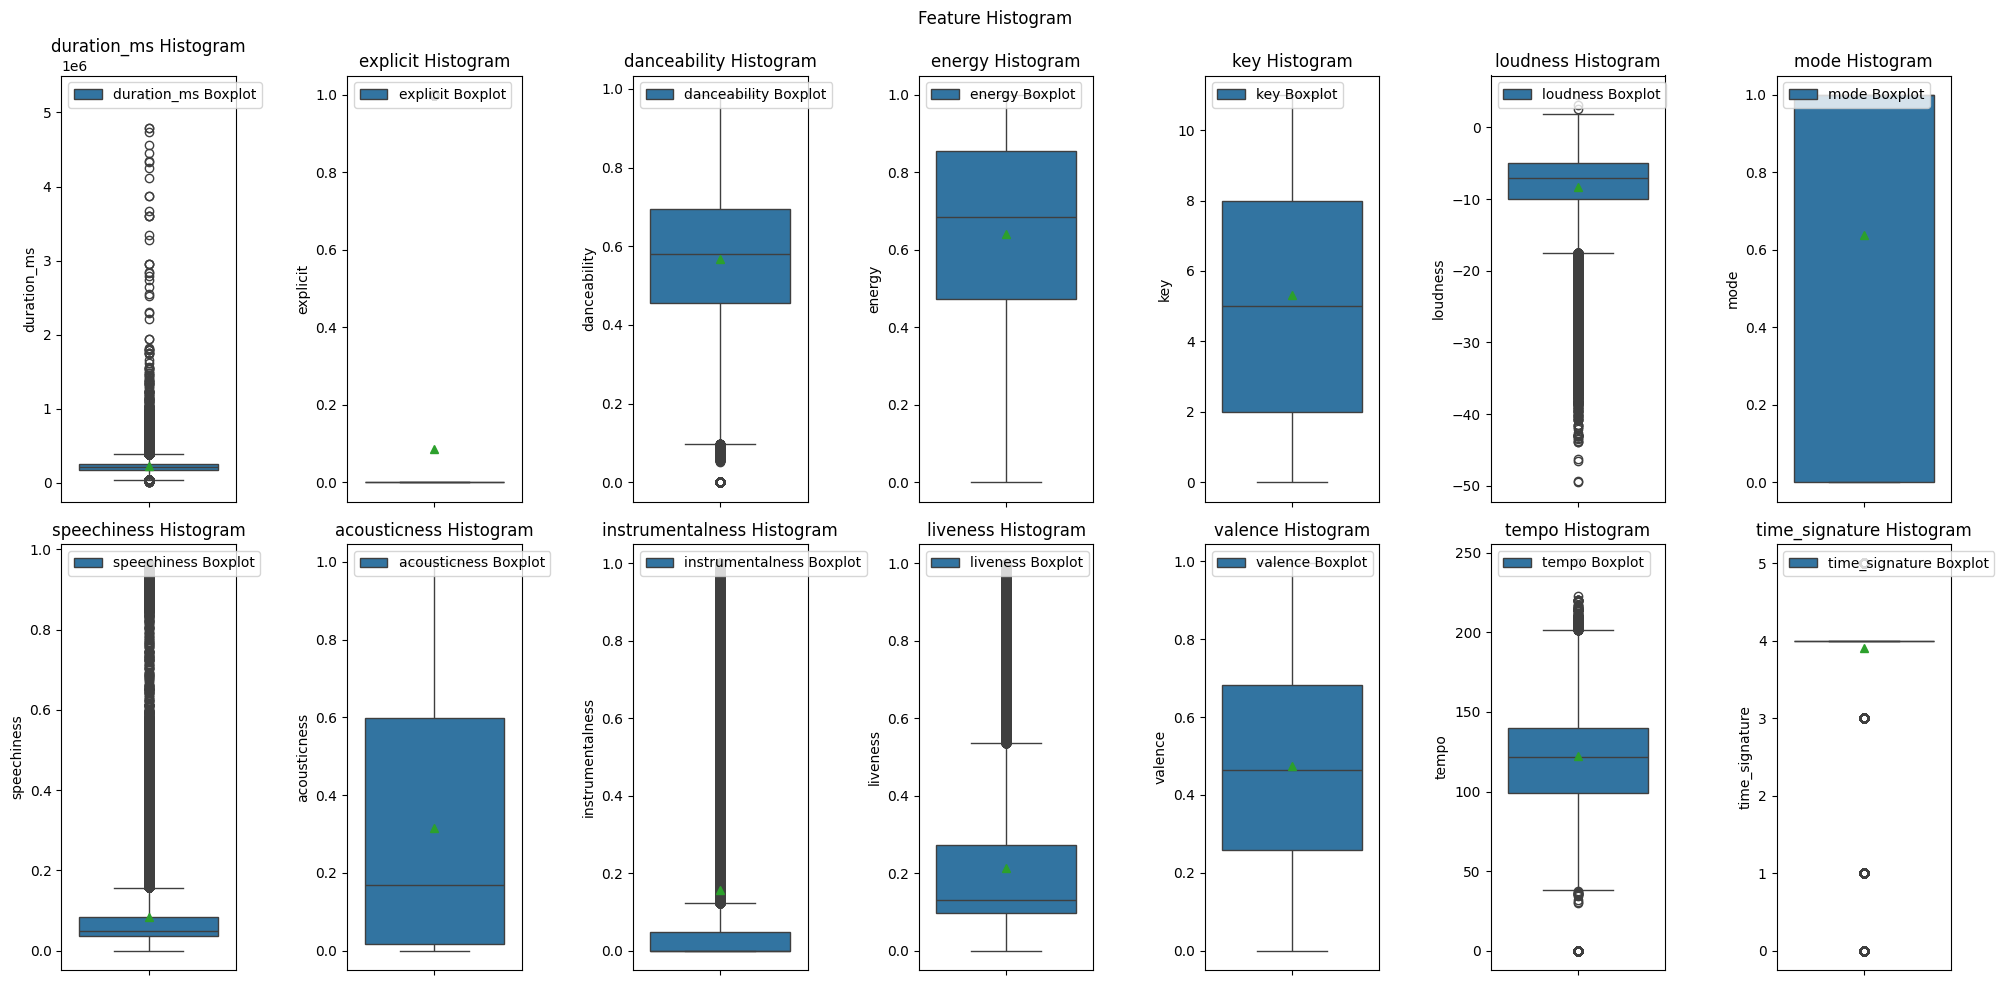

In [24]:
col=['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
fig,ax=plt.subplots(2,7,figsize=(20,10))
for index,feature in enumerate(col):
       row=index//7
       col=index%7
       sns.boxplot(dff[feature],ax=ax[row,col],showmeans=True,label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

In [25]:
def cap_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    min_value=Q1-1.5*IQR
    max_value=Q3+1.5*IQR
    return series.apply(lambda x:min_value if x<min_value else (max_value if x>max_value else x))

col=['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

for i in col:
    dff[i]=cap_outliers(df[i])


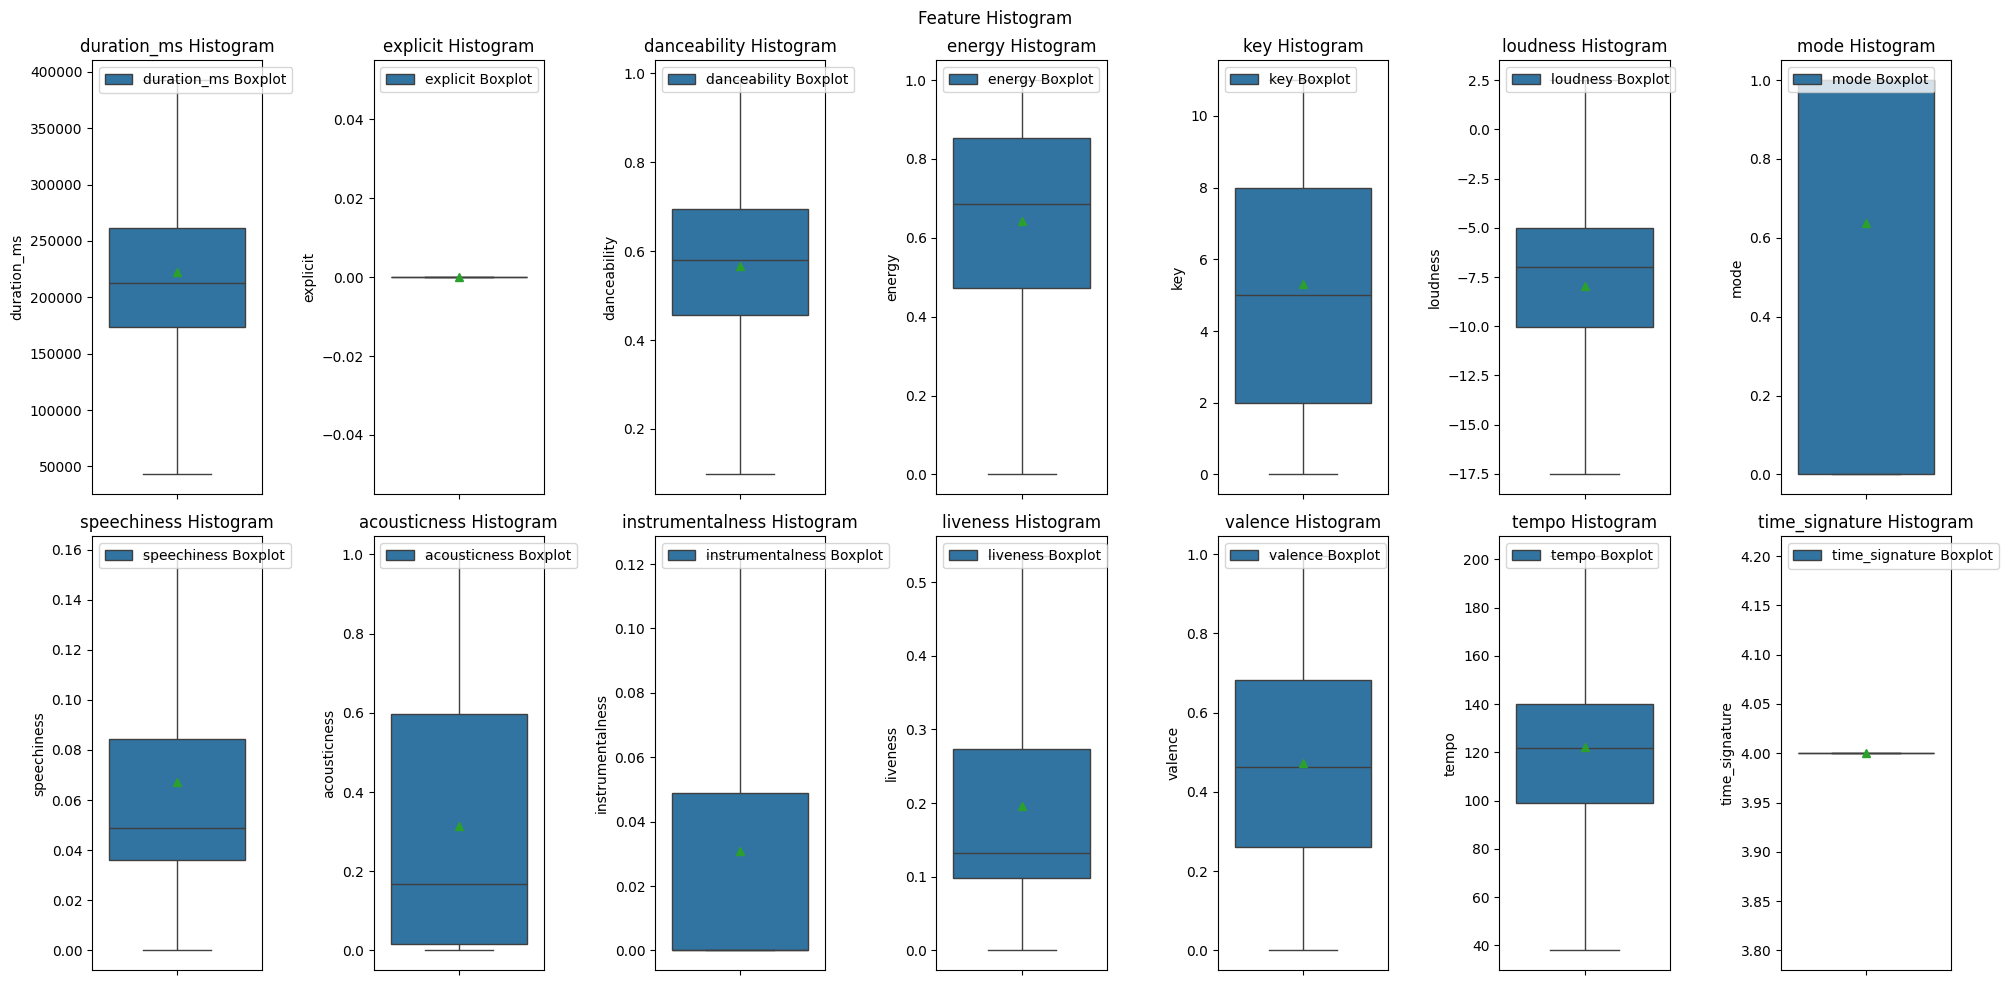

In [26]:
col=['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
fig,ax=plt.subplots(2,7,figsize=(20,10))
for index,feature in enumerate(col):
       row=index//7
       col=index%7
       sns.boxplot(dff[feature],ax=ax[row,col],showmeans=True,label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

In [27]:
! pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import gensim.downloader as api

In [29]:
glove_model=api.load("glove-wiki-gigaword-300")

KeyboardInterrupt: 

In [ ]:
glove_model.most_similar("acoustic",topn=5)

[('guitar', 0.6608458757400513),
 ('guitars', 0.6346383690834045),
 ('instrumentation', 0.6038997173309326),
 ('vocals', 0.5810157656669617),
 ('percussion', 0.5294560194015503)]

In [ ]:
unique_genre=df["track_genre"].unique()
unique_genre

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [ ]:
df["track_genre"]=df["track_genre"].replace("black-metal","metal")
df["track_genre"]=df["track_genre"].replace('chicago-house',"house")
df["track_genre"]=df["track_genre"].replace('death-metal',"metal")
df["track_genre"]=df["track_genre"].replace('deep-house',"house")
df["track_genre"]=df["track_genre"].replace('detroit-techno',"techno")
df["track_genre"]=df["track_genre"].replace('drum-and-bass',"drum")
df["track_genre"]=df["track_genre"].replace('j-dance',"dance")
df["track_genre"]=df["track_genre"].replace('j-idol',"idol")
df["track_genre"]=df["track_genre"].replace('j-rock',"rock") #'minimal-techno'
df["track_genre"]=df["track_genre"].replace('minimal-techno',"techno")
df["track_genre"]=df["track_genre"].replace('pop-film',"pop")
df["track_genre"]=df["track_genre"].replace('progressive-house',"house") #psych-rock
df["track_genre"]=df["track_genre"].replace("psych-rock","rock")
df["track_genre"]=df["track_genre"].replace("r-n-b","rnb")
df["track_genre"]=df["track_genre"].replace("show-tunes","tunes")
df["track_genre"]=df["track_genre"].replace("world-music","music")

In [ ]:
new_genre=df["track_genre"].unique()
print(new_genre)
print(len(new_genre))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime' 'metal'
 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british' 'cantopop' 'house'
 'children' 'chill' 'classical' 'club' 'comedy' 'country' 'dance'
 'dancehall' 'techno' 'disco' 'disney' 'drum' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian' 'idol' 'j-pop'
 'rock' 'jazz' 'k-pop' 'kids' 'latin' 'latino' 'malay' 'mandopop'
 'metalcore' 'mpb' 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop'
 'power-pop' 'punk-rock' 'punk' 'rnb' 'reggae' 'reggaeton' 'rock-n-roll'
 'rockabilly' 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'study'
 'swedish' 'synth-pop' 'tango' 'trance' 'trip-hop' 'turkish' 'music']
103


In [ ]:
vector=[glove_model[word] for word in new_genre]

In [ ]:
vector_df=pd.DataFrame(dict(zip(new_genre,vector)))
vector_df

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,metal,bluegrass,blues,brazil,...,soul,spanish,study,swedish,synth-pop,tango,trance,trip-hop,turkish,music
0,0.053505,0.16338,0.153710,-0.196580,0.088063,-0.454940,0.039300,-0.100720,0.013960,0.224030,...,0.371390,0.18857,-0.183190,0.107090,0.084158,0.609200,-0.031449,-0.250340,0.49777,-0.38081
1,0.412540,-0.61372,0.104600,-0.198840,0.360240,0.093253,0.106580,0.256640,0.118870,0.661010,...,-0.497310,0.11805,0.202850,-0.119710,0.007587,-0.055350,-0.017937,0.169760,0.28584,-0.24764
2,-0.293170,-0.40705,-0.086672,0.282830,0.000777,-0.104090,-0.475000,-0.249730,-0.489630,-0.687640,...,-0.145500,-0.24046,0.156140,-0.236600,-0.196070,0.061953,-0.432580,0.044528,0.69037,-0.24949
3,0.274880,0.80922,0.587830,0.263420,0.168340,-1.065800,-0.533500,0.769930,0.454970,-0.027683,...,0.276820,0.10510,0.384920,0.123500,0.149140,-0.280940,0.248430,0.520330,0.38298,0.10468
4,-0.114560,-0.35084,-0.245640,0.428730,-0.614320,-0.692490,0.380950,-0.361240,-0.371770,0.123850,...,0.136910,-0.15965,-0.008493,0.397950,-0.149440,-0.498190,0.470440,-0.433940,0.23411,-0.56411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.535290,-0.15161,-0.309080,-0.007175,0.001857,-0.010728,0.719120,-0.095939,0.236480,0.541170,...,0.203330,0.46917,0.063621,0.809900,-0.391140,-0.373960,-0.015968,0.196790,0.84941,0.33912
296,0.493630,-0.80624,-0.161620,-0.060385,-0.305820,0.435940,-0.138410,0.340060,-0.154750,-0.802920,...,0.285930,-0.30709,0.423020,0.290710,0.353720,0.678710,-0.486350,-0.584670,-0.40331,0.39308
297,0.365800,0.40026,0.402510,-0.076713,0.408200,0.656870,-0.186480,0.102230,0.033483,-0.556050,...,-0.091977,-0.20050,0.070016,0.584130,0.730500,-0.163080,0.347990,0.508030,-0.59019,0.60954
298,-0.114390,-0.36719,0.060585,0.007970,-0.646920,0.124550,-0.083764,0.298750,-0.100070,0.144810,...,-0.501870,-0.59568,-0.094043,-0.048942,0.163100,-0.073628,0.171670,-0.627320,-0.87068,-0.42627


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
new_vector=pca.fit_transform(vector)

In [ ]:
print(new_vector)
print(len(new_vector))

[[ 0.09227764  2.55967863]
 [ 2.42171009 -0.41387626]
 [ 2.8303698  -1.8234418 ]
 [-1.66056087 -0.16799305]
 [ 1.03048588  1.06881058]
 [-0.55352102 -0.1432201 ]
 [-0.85525625  0.83025505]
 [ 1.09867012  2.23213623]
 [-0.58494038  2.83010863]
 [-2.83703822 -2.03527827]
 [ 2.81890331  0.31816896]
 [-3.39846503 -1.91434645]
 [ 2.41782197 -1.09375827]
 [-3.40864583 -0.35879186]
 [-3.95715584 -0.65537137]
 [-0.56944521 -0.44455714]
 [-1.59494788  1.25886095]
 [-3.01236355 -0.21143112]
 [-2.05938583  1.21737411]
 [-3.57783481 -0.65347363]
 [-1.74834314  2.16447542]
 [ 2.58422043  0.61260271]
 [ 1.07390753  1.47095044]
 [ 0.40160457  1.28751325]
 [-2.65056915 -0.28781568]
 [-0.53960078  1.43074995]
 [ 0.84419857  0.55256419]
 [ 2.99653638  0.57662989]
 [ 1.60281613 -1.37535996]
 [ 1.56675605  0.7528601 ]
 [-1.48757143  0.29877783]
 [ 2.14274431 -0.29877404]
 [-0.87742194  2.20734789]
 [ 1.4791901  -2.31104402]
 [-3.91049924 -2.21499114]
 [ 0.68334966  2.25466454]
 [-0.73459098  0.83164333]
 

In [ ]:
pca_df=pd.DataFrame(new_vector,columns=["PCA1","PCA2"],index=new_genre)
pca_df

,PCA1,PCA2
acoustic,0.092278,2.559679
afrobeat,2.421710,-0.413876
alt-rock,2.830370,-1.823442
alternative,-1.660561,-0.167993
ambient,1.030486,1.068811
...,...,...
tango,-0.103618,0.573474
trance,0.951274,0.749286
trip-hop,2.961253,-1.488839
turkish,-3.279330,-3.302362


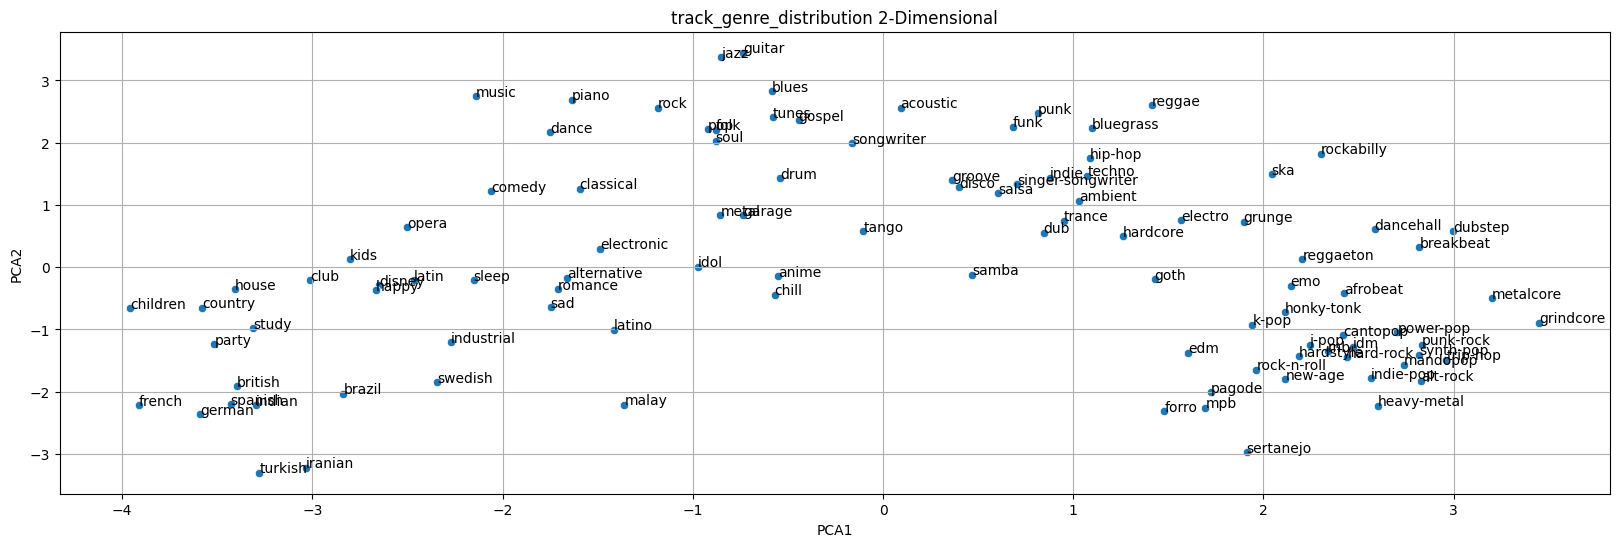

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="PCA1",y="PCA2",data=pca_df)
for index,feature in enumerate(new_genre):
    plt.annotate(feature,xy=(new_vector[index,0],new_vector[index,1]))
plt.grid(True)
plt.title("track_genre_distribution 2-Dimensional")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

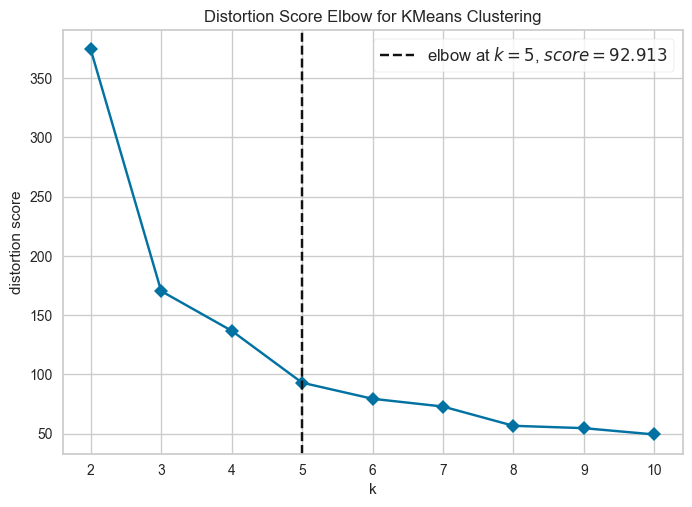

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visual=KElbowVisualizer(KMeans(random_state=42),k=(2,11),timings=False)
visual.fit(pca_df)
visual.show()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
mean=KMeans(n_clusters=5,random_state=42)
mean.fit_predict(pca_df)

array([0, 1, 1, 3, 4, 3, 0, 4, 0, 2, 1, 2, 1, 3, 2, 3, 0, 3, 3, 2, 0, 4,
       4, 4, 3, 0, 4, 1, 1, 4, 3, 1, 0, 1, 2, 4, 0, 2, 0, 1, 1, 4, 4, 0,
       3, 1, 4, 1, 1, 4, 1, 1, 2, 1, 4, 3, 2, 3, 1, 0, 0, 1, 3, 3, 3, 2,
       1, 1, 1, 1, 3, 1, 2, 0, 0, 1, 1, 4, 1, 4, 1, 1, 4, 3, 3, 4, 4, 1,
       0, 4, 4, 3, 0, 0, 2, 2, 2, 1, 4, 4, 1, 2, 0])

In [ ]:
pca_df["cluster"]=mean.fit_predict(pca_df)

In [ ]:
pca_df.head()

,PCA1,PCA2,cluster
acoustic,0.092278,2.559679,0
afrobeat,2.421710,-0.413876,1
alt-rock,2.830370,-1.823442,1
alternative,-1.660561,-0.167993,3
ambient,1.030486,1.068811,4


In [ ]:
for i in range(5):
    genre_=pca_df[pca_df["cluster"]==i].index.tolist()
    print(i)
    print(genre_)
    print("--")

0
['acoustic', 'metal', 'blues', 'classical', 'dance', 'drum', 'folk', 'garage', 'gospel', 'guitar', 'rock', 'jazz', 'piano', 'pop', 'tunes', 'songwriter', 'soul', 'music']
--
1
['afrobeat', 'alt-rock', 'breakbeat', 'cantopop', 'dubstep', 'edm', 'emo', 'forro', 'goth', 'grindcore', 'hard-rock', 'hardstyle', 'heavy-metal', 'honky-tonk', 'idm', 'indie-pop', 'j-pop', 'k-pop', 'mandopop', 'metalcore', 'mpb', 'new-age', 'pagode', 'power-pop', 'punk-rock', 'rnb', 'reggaeton', 'rock-n-roll', 'sertanejo', 'synth-pop', 'trip-hop']
--
2
['brazil', 'british', 'children', 'country', 'french', 'german', 'indian', 'iranian', 'malay', 'party', 'spanish', 'study', 'swedish', 'turkish']
--
3
['alternative', 'anime', 'house', 'chill', 'club', 'comedy', 'disney', 'electronic', 'happy', 'industrial', 'idol', 'kids', 'latin', 'latino', 'opera', 'romance', 'sad', 'sleep']
--
4
['ambient', 'bluegrass', 'dancehall', 'techno', 'disco', 'dub', 'electro', 'funk', 'groove', 'grunge', 'hardcore', 'hip-hop', 'indie

In [ ]:
mapp = {
    'acoustic': 0, 'metal': 0, 'blues': 0, 'classical': 0, 'dance': 0, 'drum': 0,
    'folk': 0, 'garage': 0, 'gospel': 0, 'guitar': 0, 'rock': 0, 'jazz': 0, 
    'piano': 0, 'pop': 0, 'tunes': 0, 'songwriter': 0, 'soul': 0, 'music': 0,
    
    'afrobeat': 1, 'alt-rock': 1, 'breakbeat': 1, 'cantopop': 1, 'dubstep': 1, 'edm': 1,
    'emo': 1, 'forro': 1, 'goth': 1, 'grindcore': 1, 'hard-rock': 1, 'hardstyle': 1,
    'heavy-metal': 1, 'honky-tonk': 1, 'idm': 1, 'indie-pop': 1, 'j-pop': 1, 'k-pop': 1,
    'mandopop': 1, 'metalcore': 1, 'mpb': 1, 'new-age': 1, 'pagode': 1, 'power-pop': 1,
    'punk-rock': 1, 'rnb': 1, 'reggaeton': 1, 'rock-n-roll': 1, 'sertanejo': 1,
    'synth-pop': 1, 'trip-hop': 1,

    'brazil': 2, 'british': 2, 'children': 2, 'country': 2, 'french': 2, 'german': 2,
    'indian': 2, 'iranian': 2, 'malay': 2, 'party': 2, 'spanish': 2, 'study': 2,
    'swedish': 2, 'turkish': 2,

    'alternative': 3, 'anime': 3, 'house': 3, 'chill': 3, 'club': 3, 'comedy': 3,
    'disney': 3, 'electronic': 3, 'happy': 3, 'industrial': 3, 'idol': 3, 'kids': 3,
    'latin': 3, 'latino': 3, 'opera': 3, 'romance': 3, 'sad': 3, 'sleep': 3,

    'ambient': 4, 'bluegrass': 4, 'dancehall': 4, 'techno': 4, 'disco': 4, 'dub': 4,
    'electro': 4, 'funk': 4, 'groove': 4, 'grunge': 4, 'hardcore': 4, 'hip-hop': 4,
    'indie': 4, 'punk': 4, 'reggae': 4, 'rockabilly': 4, 'salsa': 4, 'samba': 4,'singer-songwriter': 4, 'ska': 4, 'tango': 4, 'trance': 4}

In [ ]:
dff["track_genre"]=df["track_genre"].map(mapp)

In [ ]:
dff["Target"]=df["popularity"]

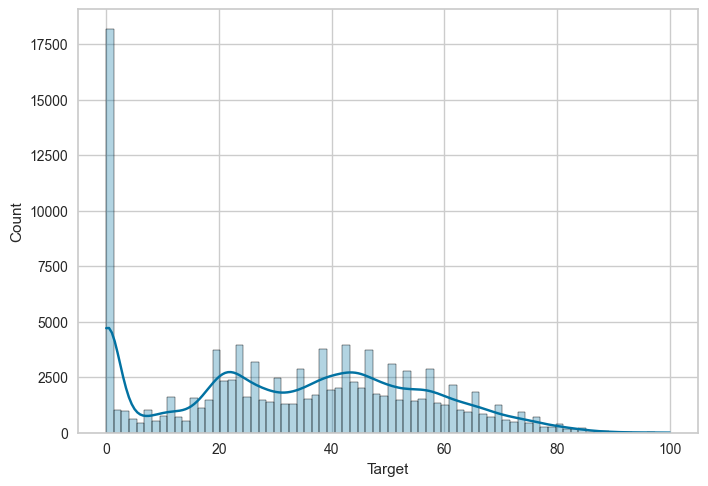

In [ ]:
sns.histplot(dff["Target"],kde=True,alpha=0.3)
plt.show()

In [ ]:
dff.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Target
0,230666.0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,4.304065
1,149610.0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0,4.025352
2,210826.0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,4.060443
3,201933.0,0.266,0.0596,0,-17.528,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,4.276666
4,198853.0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,4.418841


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113999 non-null  float64
 1   explicit          113999 non-null  float64
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  float64
 14  track_genre       113999 non-null  int64  
 15  Target            113999 non-null  int64  
dtypes: float64(12), int64(4)


In [ ]:
dff[["explicit","time_signature"]].astype(int)

,explicit,time_signature
0,0,4
1,0,4
2,0,4
3,0,4
4,0,4
...,...,...
113995,0,4
113996,0,4
113997,0,4
113998,0,4


In [ ]:
dff.drop(["explicit","time_signature"],axis=1,inplace=True)

In [ ]:
corr=dff.corr()
corr

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Target
duration_ms,1.000000,-0.075872,0.102201,0.015211,0.020457,-0.048672,-0.120237,-0.155491,0.137382,-0.015382,-0.181283,0.041448,-0.012431,0.011694
danceability,-0.075872,1.000000,0.132604,0.036514,0.205384,-0.069367,0.149279,-0.171323,-0.173777,-0.129340,0.476914,-0.058841,0.183098,0.035541
energy,0.102201,0.132604,1.000000,0.048007,0.787953,-0.078365,0.275372,-0.733908,-0.117815,0.204084,0.258937,0.246284,0.055842,0.001053
key,0.015211,0.036514,0.048007,1.000000,0.037098,-0.135911,0.042536,-0.040942,-0.001641,-0.002580,0.034099,0.010910,0.010684,-0.003847
loudness,0.020457,0.205384,0.787953,0.037098,1.000000,-0.045515,0.194148,-0.603723,-0.338104,0.110456,0.259319,0.209703,0.009816,0.056901
mode,-0.048672,-0.069367,-0.078365,-0.135911,-0.045515,1.000000,-0.089935,0.095568,-0.062052,0.010638,0.021964,0.000634,-0.056956,-0.013948
speechiness,-0.120237,0.149279,0.275372,0.042536,0.194148,-0.089935,1.000000,-0.164249,-0.066838,0.128923,0.071945,0.108010,0.085625,-0.050472
acousticness,-0.155491,-0.171323,-0.733908,-0.040942,-0.603723,0.095568,-0.164249,1.000000,0.037511,-0.050900,-0.107081,-0.209023,-0.058295,-0.025458
instrumentalness,0.137382,-0.173777,-0.117815,-0.001641,-0.338104,-0.062052,-0.066838,0.037511,1.000000,-0.075422,-0.319978,-0.024120,0.048447,-0.092115
liveness,-0.015382,-0.129340,0.204084,-0.002580,0.110456,0.010638,0.128923,-0.050900,-0.075422,1.000000,0.028107,0.017368,-0.005150,-0.010280


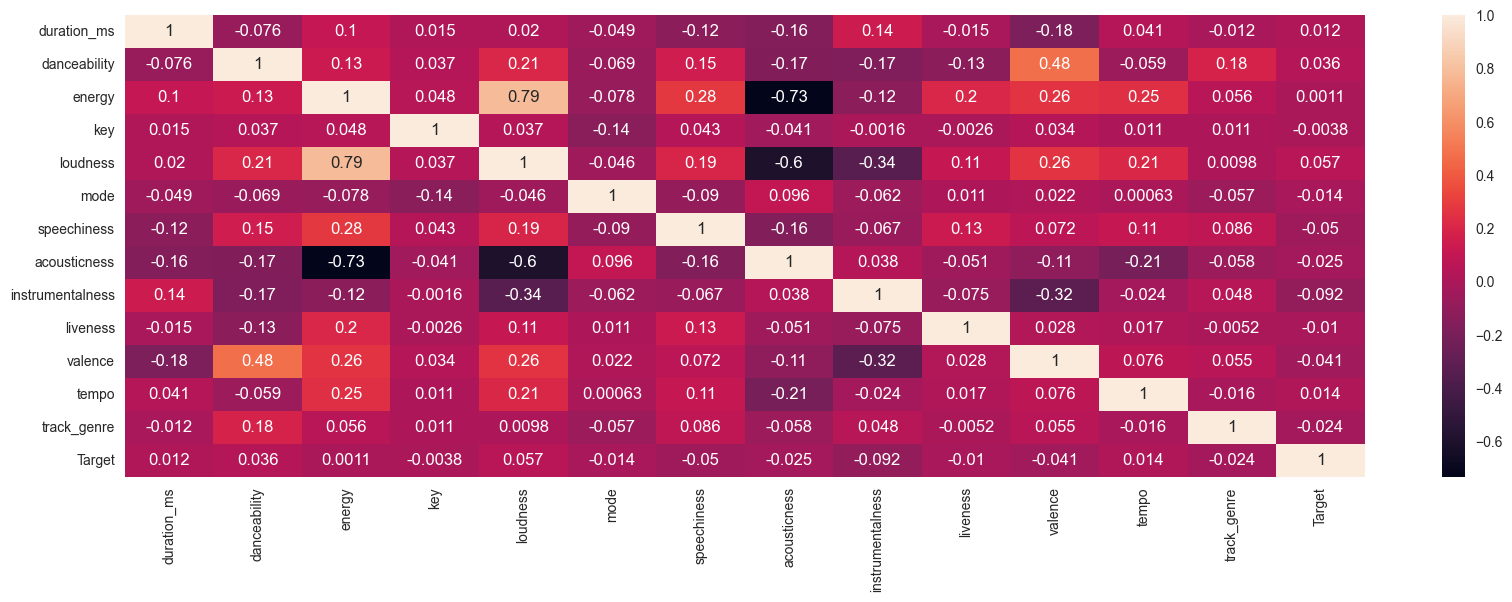

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
dff.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Target
0,230666.0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,4.304065
1,149610.0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0,4.025352
2,210826.0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,4.060443
3,201933.0,0.266,0.0596,0,-17.528,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,4.276666
4,198853.0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,4.418841


In [ ]:
x=dff.iloc[:,:-1]
y=dff.loc[:,["Target"]]

In [ ]:
x.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,230666.0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0
1,149610.0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0
2,210826.0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0
3,201933.0,0.266,0.0596,0,-17.528,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0
4,198853.0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0


In [ ]:
import statsmodels.api as sm
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     91.74
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          1.40e-245
Time:                        01:09:38   Log-Likelihood:            -1.9900e+05
No. Observations:              113999   AIC:                         3.980e+05
Df Residuals:                  113985   BIC:                         3.982e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4450      0.045  

In [ ]:
x.drop(["duration_ms","key","liveness"],axis=1,inplace=True)

In [ ]:
x.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,track_genre
0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.715,87.917,0
1,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.267,77.489,0
2,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.120,76.332,0
3,0.266,0.0596,-17.528,1,0.0363,0.9050,0.000071,0.143,181.740,0
4,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.167,119.949,0


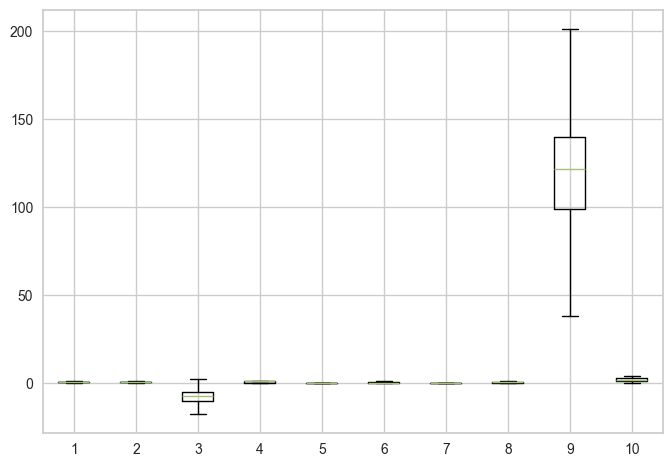

In [ ]:
plt.boxplot(x)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_norm=scalar.fit_transform(x)

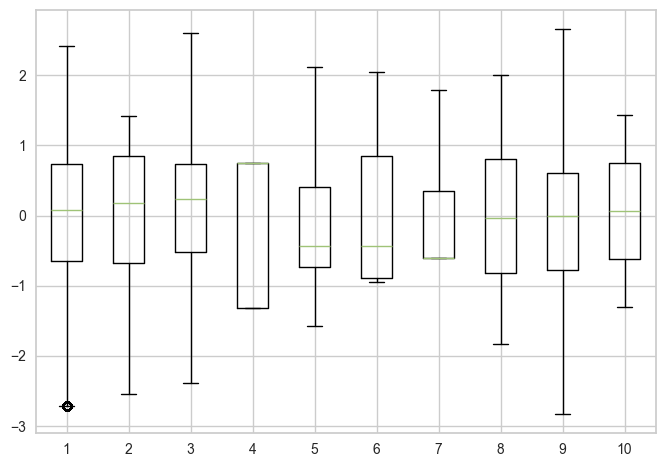

In [ ]:
plt.boxplot(x_norm)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)

#### Linear Regreassion

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
train_accuracy=linear.score(x_train,y_train)
print(train_accuracy)

0.007836157221919215


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(linear,x_train,y_train,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std.:{score.std()}")

[0.00624228 0.00893966 0.00766485 0.00581566 0.00895887]
Mean: 0.0075242622892345064
Std.:0.0013148381591565246


In [ ]:
y_pred_test=linear.predict(x_test)

In [ ]:
y_pred_train=linear.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))

0.007945752210963164
1.9387171716243725
1.0692858905985279


In [ ]:
print(r2_score(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))
print(mean_absolute_error(y_train,y_pred_train))

0.007836157221919215
1.9239238370581122
1.06662752193106


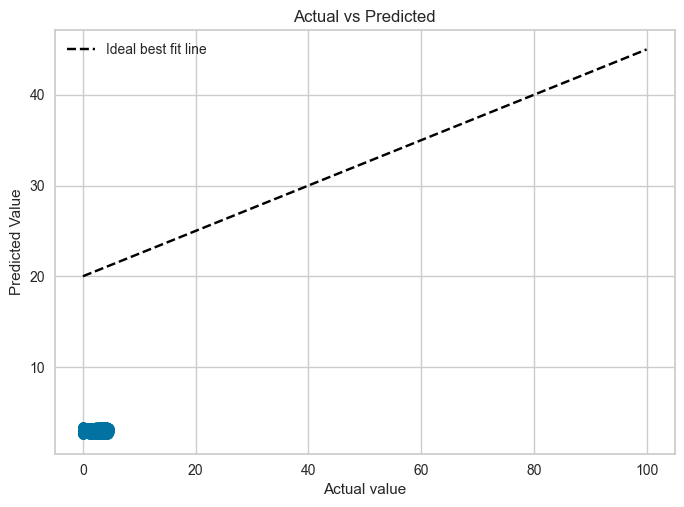

In [ ]:
plt.Figure(figsize=(10,4))
plt.scatter(y_test,y_pred_test)
plt.plot([0,100],[20,45],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Decison Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param={
      "max_depth":[1,2,3,4,5,6],
      "min_samples_split":[13,17,19,21,23,27],
      "min_samples_leaf":[11,15,17,19,23,27],
      "max_features":["sqrt","log2",None]}
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=param,scoring="r2",n_jobs=-1,cv=5)
grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_params_)




0.061269435352692934
{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 13}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=6,max_features=None,min_samples_leaf=17,min_samples_split=13)
tree.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,13
,min_samples_leaf,17
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
train_accuracy=tree.score(x_train,y_train)
print(train_accuracy)

0.06878995031076152


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,x_train,y_train,cv=5)

print(score)
print(f"Mean:{score.mean()}")
print(f"std:{score.std()}")

[0.06052745 0.05932266 0.05992214 0.06083679 0.06573667]
Mean:0.06126914258567791
std:0.0022934288893138787


In [ ]:
y_pred_tree_test=tree.predict(x_test)

In [ ]:
y_pred_tree_train=tree.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_test,y_pred_tree_test))
print(mean_squared_error(y_test,y_pred_tree_test))
print(mean_absolute_error(y_test,y_pred_tree_test))

0.06267933325461739
464.99491605874067
17.66407717556585


In [ ]:
print(r2_score(y_train,y_pred_tree_train))
print(mean_squared_error(y_train,y_pred_tree_train))
print(mean_absolute_error(y_train,y_pred_tree_train))

0.06878995031076152
463.59667418024827
17.59993132417977


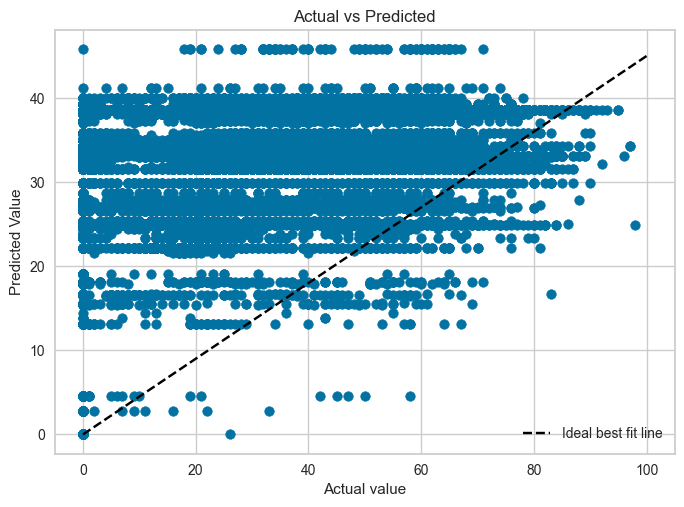

In [ ]:
plt.scatter(x=y_test,y=y_pred_tree_test)
plt.plot([0,100],[0,45],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_jobs=-1)
forest.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
train_accuracy=forest.score(x_train,y_train)
print(train_accuracy)

0.8941334779689024


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,x_train,y_train,cv=5)

print(score)
print(f"Mean:{score.mean()}")
print(f"std:{score.std()}")

[0.39838106 0.39517228 0.39243269 0.39047286 0.41067958]
Mean:0.39742769312529513
std:0.0071404202574557925


In [ ]:
y_pred_forest_test=forest.predict(x_test)
y_pred_forest_train=forest.predict(x_train)

In [ ]:
print(r2_score(y_test,y_pred_forest_test))
print(mean_absolute_error(y_test,y_pred_forest_test))
print(mean_squared_error(y_test,y_pred_forest_test))

0.42662173401808856
12.433010486846111
284.44692208263274


In [ ]:
print(r2_score(y_train,y_pred_forest_train))
print(mean_absolute_error(y_train,y_pred_forest_train))
print(mean_squared_error(y_train,y_pred_forest_train))

0.8941334779689024
4.9016728138112535
52.70493755627474


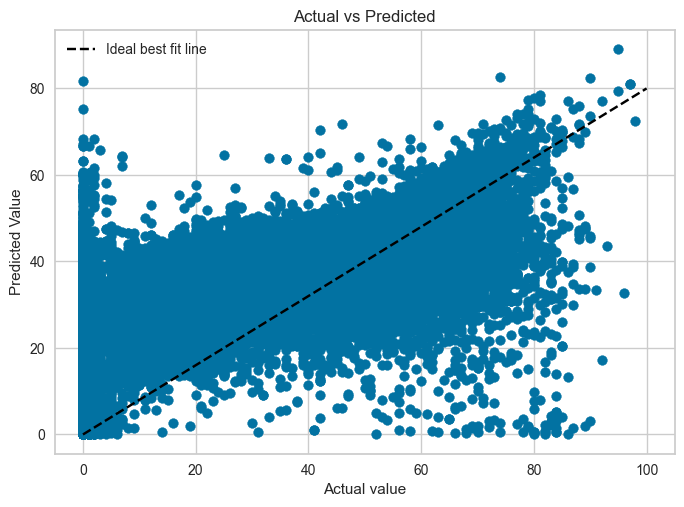

In [ ]:
plt.scatter(y_test,y_pred_forest_test)
plt.plot([0,100],[0,80],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(x_train,y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
train_accuracy=gradient.score(x_train,y_train)
print(train_accuracy)

0.098428886150012


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gradient,x_train,y_train,cv=5)
print(score)
print(f"Mean:{score.mean()}")
print(f"std:{score.std()}")


[0.089603   0.08733446 0.08874048 0.09282079 0.08921431]
Mean:0.0895426087550335
std:0.0018098198782676412


In [ ]:
y_pred_test_gradient=gradient.predict(x_test)
y_pred_train_gradient=gradient.predict(x_train)

In [ ]:
print(r2_score(y_test,y_pred_test_gradient))
print(mean_absolute_error(y_test,y_pred_test_gradient))
print(mean_squared_error(y_test,y_pred_test_gradient))

0.08992433933197341
17.491210936023222
451.4789553385431


In [ ]:
print(r2_score(y_train,y_pred_train_gradient))
print(mean_absolute_error(y_train,y_pred_train_gradient))
print(mean_squared_error(y_train,y_pred_train_gradient))

0.098428886150012
17.41312512479635
448.84112887024685


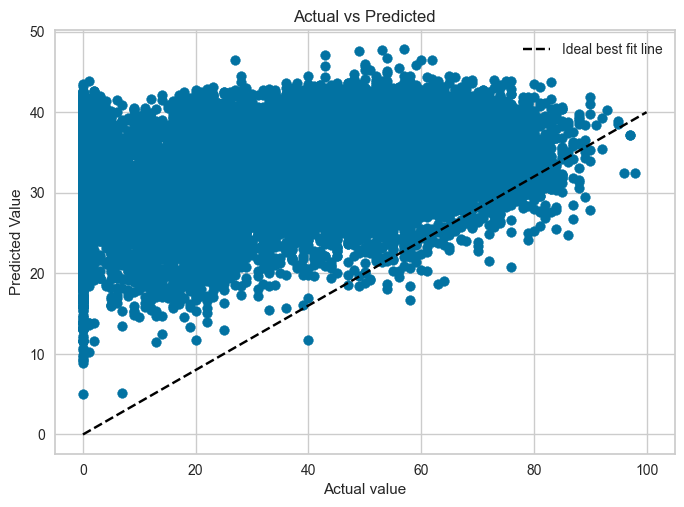

In [ ]:
plt.scatter(y_test,y_pred_test_gradient)
plt.plot([0,100],[0,40],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Xgboost

In [ ]:
from xgboost import XGBRFRegressor
xg=XGBRFRegressor()
xg.fit(x_train,y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [ ]:
train_accuracy=xg.score(x_train,y_train)
print(train_accuracy)

0.08346283435821533


In [ ]:
y_pred_test_xg=xg.predict(x_test)
y_pred_train_xg=xg.predict(x_train)

In [ ]:
print(r2_score(y_test,y_pred_test_xg))
print(mean_absolute_error(y_test,y_pred_test_xg))
print(mean_squared_error(y_test,y_pred_test_xg))

0.07703125476837158
17.619766235351562
457.8750915527344


In [ ]:
print(r2_score(y_train,y_pred_train_xg))
print(mean_absolute_error(y_train,y_pred_train_xg))
print(mean_squared_error(y_train,y_pred_train_xg))

0.08346283435821533
17.552064895629883
456.2919006347656


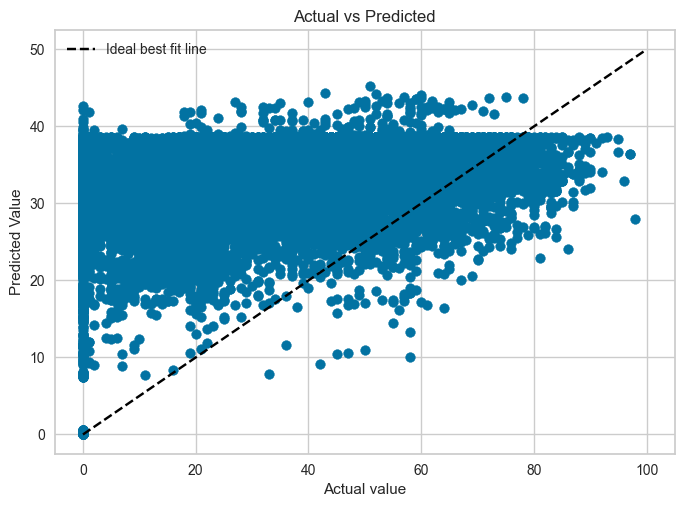

In [ ]:
plt.scatter(y_test,y_pred_test_xg)
plt.plot([0,100],[0,50],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
! pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Dense,ReLU,Dropout #type:ignore


In [ ]:
linear=Sequential()
linear.add(Dense(units=30,kernel_initializer="he_uniform",activation="relu",input_dim=10))
linear.add(Dropout(0.2))
linear.add(Dense(units=20,activation="relu",kernel_initializer="he_uniform"))
linear.add(Dropout(0.2))
linear.add(Dense(units=10,activation="relu",kernel_initializer="he_uniform"))
linear.add(Dropout(0.2))
linear.add(Dense(units=1))


In [ ]:
linear.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [ ]:
model=linear.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=1000,epochs=100)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1289.6575 - mae: 29.6173 - val_loss: 635.8573 - val_mae: 21.1887
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 689.9073 - mae: 21.8016 - val_loss: 540.7903 - val_mae: 19.5595
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 627.2780 - mae: 20.7686 - val_loss: 519.6252 - val_mae: 19.0750
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 594.6838 - mae: 20.1173 - val_loss: 509.6012 - val_mae: 18.8335
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 579.3108 - mae: 19.8705 - val_loss: 501.9072 - val_mae: 18.6696
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 571.9427 - mae: 19.7167 - val_loss: 496.9372 - val_mae: 18.5697
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 571.5033 - mae: 19.7009 - val_loss: 495.0414 - val_mae: 18.5257
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 566.8561 - mae: 19.6510 - val_loss: 494.1871 - val_mae: 18.5159
Epoch 9/100
92/

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


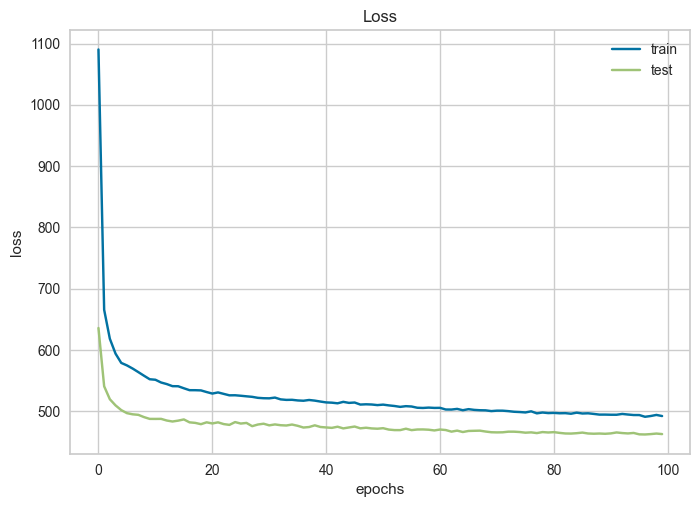

In [ ]:
plt.plot(model.history["loss"],label="train")
plt.plot(model.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()
plt.show()

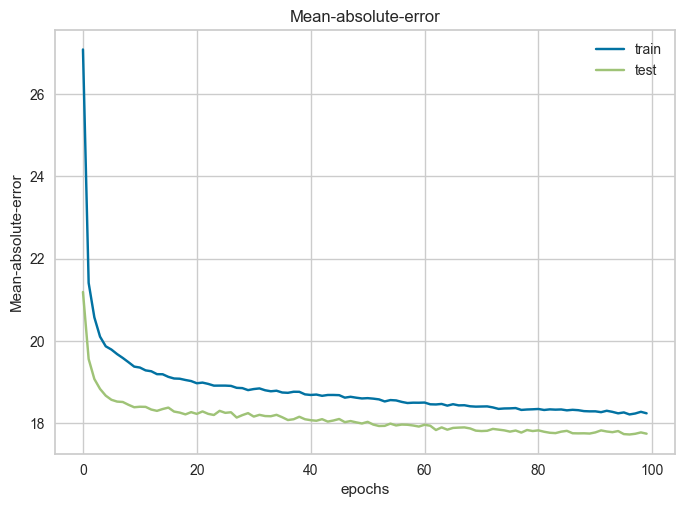

In [ ]:
plt.plot(model.history["mae"],label="train")
plt.plot(model.history["val_mae"],label="test")
plt.xlabel("epochs")
plt.ylabel("Mean-absolute-error")
plt.title("Mean-absolute-error")
plt.legend()
plt.show()

In [ ]:
y_pred_test_ANN=linear.predict(x_test)
y_pred_train_ANN=linear.predict(x_train)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step


In [ ]:
print(r2_score(y_test,y_pred_test_ANN))
print(mean_absolute_error(y_test,y_pred_test_ANN))
print(mean_squared_error(y_test,y_pred_test_ANN))

0.06717270612716675
17.74562644958496
462.7657775878906


In [ ]:
print(r2_score(y_train,y_pred_train_ANN))
print(mean_absolute_error(y_train,y_pred_train_ANN))
print(mean_squared_error(y_train,y_pred_train_ANN))

0.07140326499938965
17.722488403320312
462.2956848144531


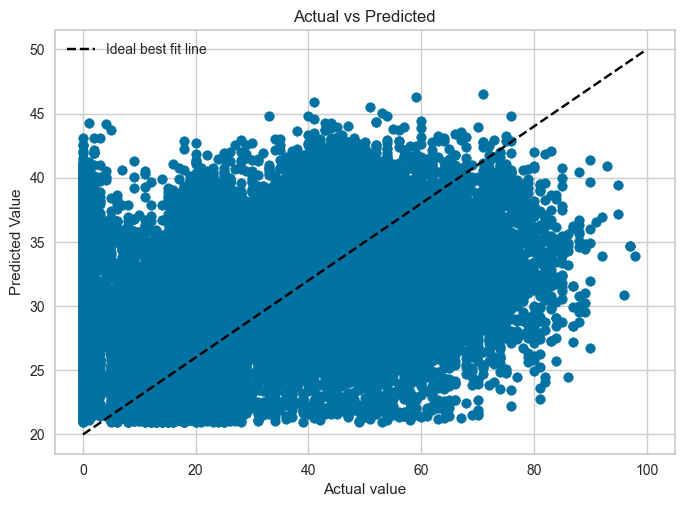

In [ ]:
plt.scatter(y_test,y_pred_test_ANN)
plt.plot([0,100],[20,50],linestyle="dashed",color="black",label="Ideal best fit line")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Comparison

In [ ]:
from sklearn.metrics import r2_score
Comparison=pd.DataFrame({"LinearRegression":r2_score(y_test,y_pred_test),
                         "DecisionTreeRegressor":r2_score(y_test,y_pred_tree_test),
                         "RandomForestRegressor":r2_score(y_test,y_pred_forest_test),
                         "GradientBoostingRegressor":r2_score(y_test,y_pred_test_gradient),
                         "XGBRFRegressor":r2_score(y_test,y_pred_test_xg),
                         "ANN":r2_score(y_test,y_pred_test_ANN)},index=["r2_score"])
Comparison_df=Comparison.T.reset_index()

In [ ]:
Comparison_df

,index,r2_score
0,LinearRegression,0.023250
1,DecisionTreeRegressor,0.062679
2,RandomForestRegressor,0.426622
3,GradientBoostingRegressor,0.089924
4,XGBRFRegressor,0.077031
5,ANN,0.067173


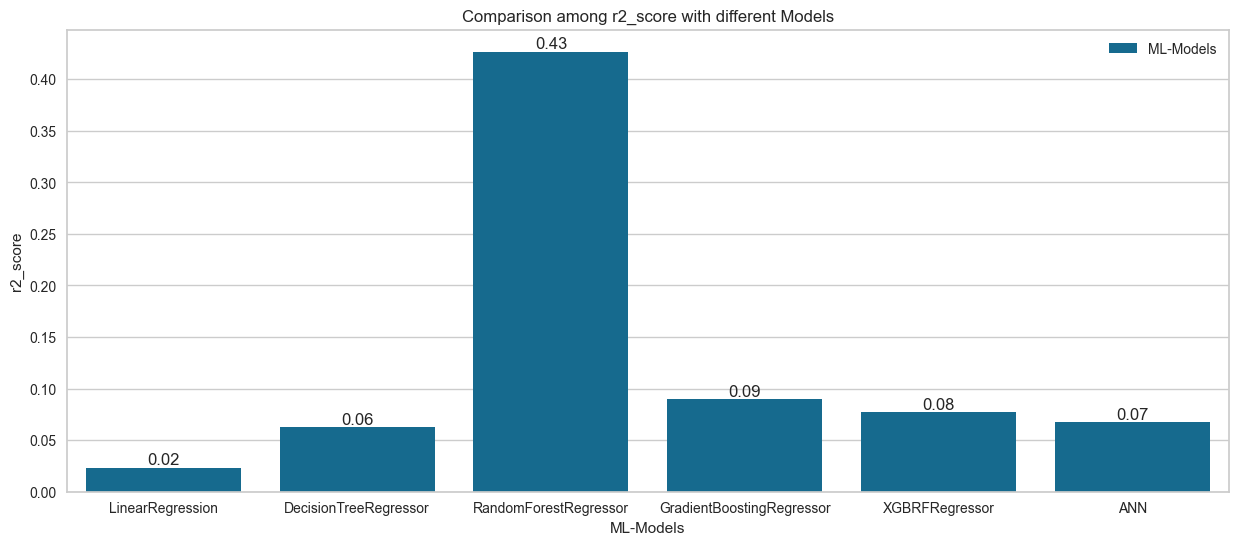

In [ ]:
plt.figure(figsize=(15,6))
bar=sns.barplot(x="index",y="r2_score",data=Comparison_df,label="ML-Models")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("ML-Models")
plt.ylabel("r2_score")
plt.title("Comparison among r2_score with different Models")
plt.legend()
plt.show()